In [1]:
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GMM

In [14]:
df = pd.read_csv('S&P500_2017.csv')
df = df.drop(['Date'],axis=1)
df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,46.074703,45.816051,170.237915,113.847588,59.784031,80.855621,37.982937,114.158501,103.480003,70.577911,...,36.900692,57.513260,86.670731,58.296070,26.833357,48.875042,61.848686,102.513084,42.586197,53.118965
1,46.679256,46.211868,171.634933,113.720161,60.626999,82.862099,38.284462,114.432961,104.139999,70.431908,...,37.027840,57.094593,85.717155,58.773418,27.845938,49.603493,62.073734,103.455551,43.197666,53.634392
2,46.124260,45.410336,171.515182,114.298462,61.086800,81.902901,38.615170,112.717552,105.910004,69.419624,...,36.607288,56.403305,84.439362,58.007671,27.729099,49.150673,62.279217,104.120262,42.497429,53.455975
3,47.561314,45.726990,169.269974,115.572708,61.105961,82.999107,39.665661,114.001671,108.300003,69.692154,...,36.568165,57.493786,84.391678,57.967899,27.300703,48.806133,63.032623,104.130180,42.773582,53.624477
4,47.709969,46.587898,169.170197,116.631294,61.508286,83.664680,39.626755,112.727356,108.570000,70.023094,...,35.952015,57.503525,82.999451,58.146900,27.144920,48.599411,63.208748,106.154053,42.310051,53.475800


In [15]:
df= df.drop(df.select_dtypes(['object']).columns,axis=1)

In [16]:
df=df.fillna(df.mean())

In [17]:
mm1 = MinMaxScaler()
mm1.fit(df)
dfm = pd.DataFrame(mm1.transform(df),columns=df.columns)

In [18]:
dfm.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,0.000000,0.418056,0.956029,0.002056,0.043814,0.366684,0.000000,0.073698,0.000000,0.051066,...,0.166359,0.179791,1.000000,0.356753,0.000000,0.114046,0.000000,0.000000,0.308037,0.047134
1,0.024818,0.446591,0.970721,0.000000,0.065179,0.455802,0.015693,0.080048,0.008057,0.044629,...,0.177850,0.158644,0.920745,0.386877,0.150246,0.145893,0.010597,0.031885,0.355288,0.072241
2,0.002034,0.388808,0.969462,0.009330,0.076833,0.413199,0.032906,0.040364,0.029663,0.000000,...,0.139841,0.123728,0.814544,0.338553,0.132909,0.126097,0.020273,0.054372,0.301178,0.063550
3,0.061028,0.411636,0.945849,0.029888,0.077318,0.461887,0.087580,0.070070,0.058838,0.012015,...,0.136305,0.178807,0.810581,0.336043,0.069344,0.111034,0.055750,0.054708,0.322517,0.071758
4,0.067131,0.473700,0.944800,0.046966,0.087515,0.491448,0.085555,0.040591,0.062134,0.026605,...,0.080619,0.179299,0.694869,0.347339,0.046229,0.101996,0.064044,0.123178,0.286698,0.064516


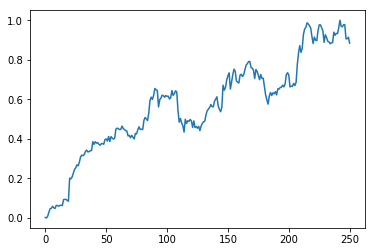

In [19]:
plt.plot(dfm.AAPL)

In [20]:
def dias(X):
    y = 0
    for i in range(1,len(X)):
        if (X[i-1]< X[i]):
            y = y + 1     
    return y
def ren(X):
    y = []
    for i in range(1,len(X)):
        y.append((X[i]-X[i-1])/X[i-1])   
    return np.mean(y)

In [21]:
d = []
r = []
for col in dfm.columns:
    d.append(dias(dfm[col]))
    r.append(ren(df[col]))

In [22]:
X = pd.DataFrame(columns=df.columns)
X = X.T
X['Media'] = dfm.mean()
X['Std'] = dfm.std()
X['dias'] = d
X['r'] = r

In [23]:
X.head()

,Media,Std,dias,r
A,0.531590,0.277873,141,0.001551
AAL,0.518438,0.230840,128,0.000664
AAP,0.452856,0.302158,114,-0.001821
AAPL,0.567622,0.243796,137,0.001632
ABBV,0.398465,0.333128,143,0.001958


In [24]:
X= X.fillna(X.mean())

In [25]:
X.describe()

,Media,Std,dias,r
count,503.000000,503.000000,503.000000,503.000000
mean,0.480162,0.250972,132.304175,0.000747
std,0.085494,0.030697,11.202808,0.001093
min,0.151546,0.096946,39.000000,-0.002363
25%,0.419322,0.232464,126.000000,0.000216
50%,0.482554,0.251447,133.000000,0.000759
75%,0.539894,0.270599,139.000000,0.001243
max,0.781866,0.351502,157.000000,0.013025


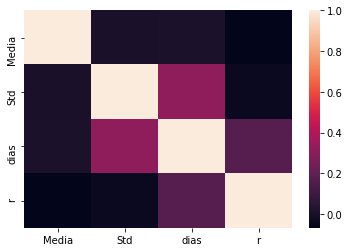

In [26]:
sns.heatmap(X.corr())

In [27]:
sc = StandardScaler()
mm = MinMaxScaler()
sc.fit(X)
mm.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

In [28]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [29]:
mds = MDS(n_components=2)
Xm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

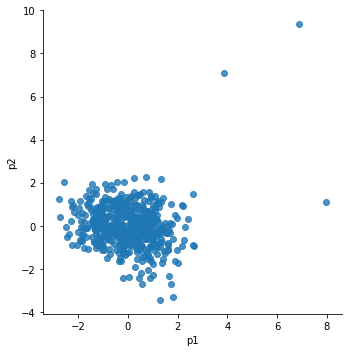

In [30]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

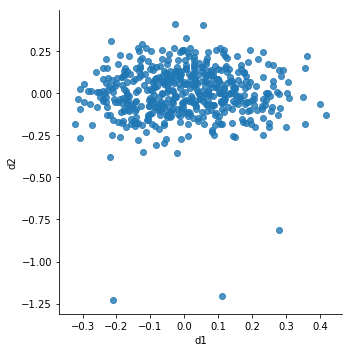

In [31]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)

In [32]:
lst_inertia = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xmm)
    lst_inertia.append(cl.inertia_)

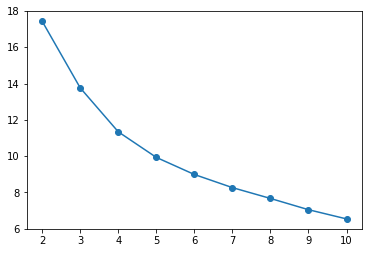

In [33]:
plt.plot(range(2,11),lst_inertia,marker='o')

In [34]:
cl = AgglomerativeClustering(n_clusters=4)

In [35]:
Xp['cl']=Xmm['cl'] = Xm['cl']=Xp['cl'] =X['cl']= cl.fit_predict(Xmm)

In [36]:
from sklearn.feature_selection import SelectKBest

In [37]:
sk = SelectKBest(k=4)
sk.fit(Xmm[['Media','Std','dias','r']],Xmm['cl'])

SelectKBest(k=4, score_func=<function f_classif at 0x7fdf71d709b0>)

In [38]:
var_best= [x for x,y in zip(['Media','Std','dias','r'],sk.get_support()) if y]
var_best

['Media', 'Std', 'dias', 'r']

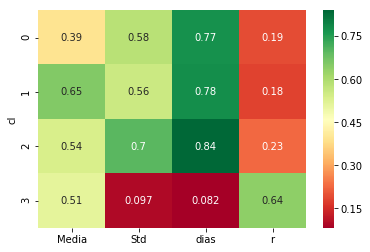

In [39]:
sns.heatmap(Xmm[['cl']+var_best].groupby('cl').mean(),annot=True,cmap='RdYlGn')

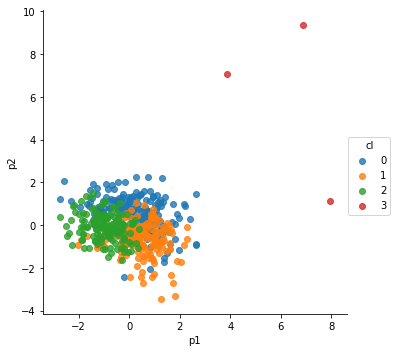

In [40]:
sns.lmplot(data=Xp,x='p1',y='p2',hue='cl',fit_reg=False)

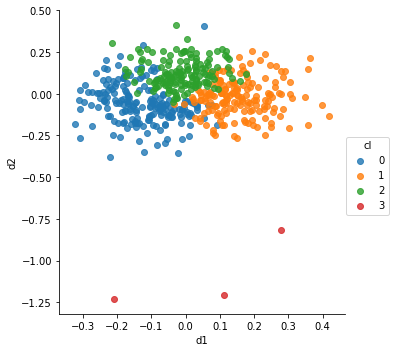

In [41]:
sns.lmplot(data=Xm,x='d1',y='d2',hue='cl',fit_reg=False)

In [43]:
X.loc[X['cl']==3]

,Media,Std,dias,r,cl
BHF,0.781866,0.131433,61,0.013025,3
BKNG,0.489464,0.136761,46,0.000558,3
WELL,0.151546,0.096946,39,0.008883,3
